- Regarder un niveau de stratification pour le climat (Koppen Geiger = 30 climats donc K_means avec k=30) Donc ce sera fait avec plus d'oiseaux.
- Dans ces 30 classes de clusters est-ce que ça correspond aux 30 classes de climat d'appariemment des oiseaux par rapport à leurs coordonnées géographiques
- On peut le plotter pour le regarder (couleur de la var cluster , var visuelle pour l'espèce d'oiseau).
- Regarder plus la composition des clusters, ici c'est important d'avoir valeur statistique
- Sur les backgrounds, ce serait intéressant de regarder les features les plus variables (TSNE et leur explicabilité)
Faire un TSNE (couleur des clusters et regarder les outliers)

- La taille de l'échantillon est importante faire au moins nbDeFeatures*10 images d'oiseaux. Utiliser par exemple des features sortant d'un réseau de neurones comme ResNET.
- Fitter les backgrounds sur une map et est-ce qu'il y a un comportement?
- Est-ce que les backgrounds sont consistants entre eux ? Si oui est-ce avec une forme géométrique? si oui est-ce qu'ils le sont avec le plumage de l'oiseau?


# Librairies

In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from shapely.geometry import Point
import geopandas.tools

# Chargement des données

In [5]:

# Remplace 'chemin_vers_ton_fichier.csv' par le chemin de ton fichier CSV
df_features = pd.read_csv('../../Donnees/birds_features.csv')
df_coords = pd.read_csv('../../Donnees/climate_coordinates_data.csv')


In [8]:
# Exemple : Fusionner les deux DataFrames sur une colonne 'ID' (ajuster selon ton cas)
df= pd.merge(df_features, df_coords, on='image_name', how='inner')
df.reset_index(inplace=True, drop=True)

# Vérifier la structure du DataFrame combiné
print(df.head())

   Unnamed: 0_x                  species_x                   image_name  \
0             0  Hemiphaga_novaeseelandiae  Hemiphaga_novaeseelandiae_3   
1             1  Hemiphaga_novaeseelandiae  Hemiphaga_novaeseelandiae_2   
2             2  Hemiphaga_novaeseelandiae  Hemiphaga_novaeseelandiae_1   
3             3  Hemiphaga_novaeseelandiae  Hemiphaga_novaeseelandiae_5   
4             4  Hemiphaga_novaeseelandiae  Hemiphaga_novaeseelandiae_4   

        f1        f2        f3        f4        f5        f6        f7  ...  \
0  0.35026  0.006831  0.012756  0.000000  0.013939  0.053352  0.088114  ...   
1  0.00000  0.005416  0.017902  0.000000  0.051494  0.000000  0.006187  ...   
2  0.00000  0.006752  0.038978  0.000000  0.000860  0.030378  0.054930  ...   
3  0.00000  0.047981  0.018533  0.000000  0.013356  0.009574  0.052967  ...   
4  0.00000  0.007569  0.000119  0.001641  0.264834  0.010646  0.056266  ...   

      f2046  f2047     f2048  Unnamed: 0_y                  species_y  \
0

In [10]:
df

,Unnamed: 0_x,species_x,image_name,f1,f2,f3,f4,f5,f6,f7,...,f2046,f2047,f2048,Unnamed: 0_y,species_y,climate_var1,climate_var2,climate_var3,latitude,longitude
0,0,Hemiphaga_novaeseelandiae,Hemiphaga_novaeseelandiae_3,0.350260,0.006831,0.012756,0.000000,0.013939,0.053352,0.088114,...,0.000000,0.000000,0.383120,2,Hemiphaga_novaeseelandiae,Temperate,Warm summer,Without dry season,-40.138815,176.543908
1,1,Hemiphaga_novaeseelandiae,Hemiphaga_novaeseelandiae_2,0.000000,0.005416,0.017902,0.000000,0.051494,0.000000,0.006187,...,0.003290,0.000000,0.099105,1,Hemiphaga_novaeseelandiae,Temperate,Warm summer,Without dry season,-40.404742,176.593951
2,2,Hemiphaga_novaeseelandiae,Hemiphaga_novaeseelandiae_1,0.000000,0.006752,0.038978,0.000000,0.000860,0.030378,0.054930,...,0.047051,0.000000,0.137070,0,Hemiphaga_novaeseelandiae,Temperate,Warm summer,Without dry season,-39.800397,176.973603
3,3,Hemiphaga_novaeseelandiae,Hemiphaga_novaeseelandiae_5,0.000000,0.047981,0.018533,0.000000,0.013356,0.009574,0.052967,...,0.000000,0.000000,0.291787,4,Hemiphaga_novaeseelandiae,Temperate,Warm summer,Without dry season,-43.667030,172.787965
4,4,Hemiphaga_novaeseelandiae,Hemiphaga_novaeseelandiae_4,0.000000,0.007569,0.000119,0.001641,0.264834,0.010646,0.056266,...,0.000000,0.000000,0.258710,3,Hemiphaga_novaeseelandiae,Polar,Tundra,NaN,-44.808080,167.771025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,890,Larus_occidentalis,Larus_occidentalis_4,0.106483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.014820,888,Larus_occidentalis,Arid,Steppe,Cold,32.850955,-117.273108
856,891,Thryomanes_bewickii,Thryomanes_bewickii_2,0.059418,0.000000,0.029876,0.000000,0.038954,0.000000,0.272748,...,0.004270,0.000000,0.000000,891,Thryomanes_bewickii,Temperate,Hot summer,Without dry season,30.412419,-97.901376
857,892,Thryomanes_bewickii,Thryomanes_bewickii_3,0.047502,0.000000,0.000000,0.000000,0.000000,0.000000,0.152380,...,0.000000,0.000000,0.009607,892,Thryomanes_bewickii,Temperate,Warm summer,Dry winter,19.668299,-99.018800
858,893,Thryomanes_bewickii,Thryomanes_bewickii_4,0.000000,0.000000,0.000000,0.048386,0.001224,0.000000,0.000000,...,0.000000,0.000000,0.000000,893,Thryomanes_bewickii,Temperate,Hot summer,Without dry season,30.413227,-97.901283


In [12]:
df.reset_index(inplace=True, drop=True)
df

,Unnamed: 0_x,species_x,image_name,f1,f2,f3,f4,f5,f6,f7,...,f2046,f2047,f2048,Unnamed: 0_y,species_y,climate_var1,climate_var2,climate_var3,latitude,longitude
0,0,Hemiphaga_novaeseelandiae,Hemiphaga_novaeseelandiae_3,0.350260,0.006831,0.012756,0.000000,0.013939,0.053352,0.088114,...,0.000000,0.000000,0.383120,2,Hemiphaga_novaeseelandiae,Temperate,Warm summer,Without dry season,-40.138815,176.543908
1,1,Hemiphaga_novaeseelandiae,Hemiphaga_novaeseelandiae_2,0.000000,0.005416,0.017902,0.000000,0.051494,0.000000,0.006187,...,0.003290,0.000000,0.099105,1,Hemiphaga_novaeseelandiae,Temperate,Warm summer,Without dry season,-40.404742,176.593951
2,2,Hemiphaga_novaeseelandiae,Hemiphaga_novaeseelandiae_1,0.000000,0.006752,0.038978,0.000000,0.000860,0.030378,0.054930,...,0.047051,0.000000,0.137070,0,Hemiphaga_novaeseelandiae,Temperate,Warm summer,Without dry season,-39.800397,176.973603
3,3,Hemiphaga_novaeseelandiae,Hemiphaga_novaeseelandiae_5,0.000000,0.047981,0.018533,0.000000,0.013356,0.009574,0.052967,...,0.000000,0.000000,0.291787,4,Hemiphaga_novaeseelandiae,Temperate,Warm summer,Without dry season,-43.667030,172.787965
4,4,Hemiphaga_novaeseelandiae,Hemiphaga_novaeseelandiae_4,0.000000,0.007569,0.000119,0.001641,0.264834,0.010646,0.056266,...,0.000000,0.000000,0.258710,3,Hemiphaga_novaeseelandiae,Polar,Tundra,NaN,-44.808080,167.771025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,890,Larus_occidentalis,Larus_occidentalis_4,0.106483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.014820,888,Larus_occidentalis,Arid,Steppe,Cold,32.850955,-117.273108
856,891,Thryomanes_bewickii,Thryomanes_bewickii_2,0.059418,0.000000,0.029876,0.000000,0.038954,0.000000,0.272748,...,0.004270,0.000000,0.000000,891,Thryomanes_bewickii,Temperate,Hot summer,Without dry season,30.412419,-97.901376
857,892,Thryomanes_bewickii,Thryomanes_bewickii_3,0.047502,0.000000,0.000000,0.000000,0.000000,0.000000,0.152380,...,0.000000,0.000000,0.009607,892,Thryomanes_bewickii,Temperate,Warm summer,Dry winter,19.668299,-99.018800
858,893,Thryomanes_bewickii,Thryomanes_bewickii_4,0.000000,0.000000,0.000000,0.048386,0.001224,0.000000,0.000000,...,0.000000,0.000000,0.000000,893,Thryomanes_bewickii,Temperate,Hot summer,Without dry season,30.413227,-97.901283


In [14]:
# Si nécessaire, enlève les colonnes inutiles
# Par exemple, si 'nom' ou 'espèce' sont présentes, tu peux les enlever
df_mean = df.drop(['species_x', 'image_name','Unnamed: 0_x','Unnamed: 0_y', 'species_x', 'species_y','climate_var1','climate_var2','climate_var3','longitude', 'latitude'], axis=1)
df_mean

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f2039,f2040,f2041,f2042,f2043,f2044,f2045,f2046,f2047,f2048
0,0.350260,0.006831,0.012756,0.000000,0.013939,0.053352,0.088114,0.016191,0.340918,0.632682,...,0.190706,0.000000,0.036818,0.000308,0.171648,0.002268,0.000000,0.000000,0.000000,0.383120
1,0.000000,0.005416,0.017902,0.000000,0.051494,0.000000,0.006187,0.041856,0.066160,0.098690,...,0.050344,0.000000,0.007801,0.000000,0.054724,0.000000,0.000000,0.003290,0.000000,0.099105
2,0.000000,0.006752,0.038978,0.000000,0.000860,0.030378,0.054930,0.022035,0.356346,0.366613,...,0.151543,0.000000,0.046518,0.015797,0.139019,0.061424,0.000000,0.047051,0.000000,0.137070
3,0.000000,0.047981,0.018533,0.000000,0.013356,0.009574,0.052967,0.000000,0.000000,0.034103,...,0.000000,0.000000,0.000000,0.001774,0.524057,0.013657,0.040853,0.000000,0.000000,0.291787
4,0.000000,0.007569,0.000119,0.001641,0.264834,0.010646,0.056266,0.015080,0.394821,0.503336,...,0.649489,0.225904,0.068265,0.115173,0.457750,0.000000,0.000000,0.000000,0.000000,0.258710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0.106483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018393,0.005491,...,0.012603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014820
856,0.059418,0.000000,0.029876,0.000000,0.038954,0.000000,0.272748,0.000000,0.007823,0.048426,...,0.010277,0.000000,0.000000,0.053013,0.002125,0.100957,0.000000,0.004270,0.000000,0.000000
857,0.047502,0.000000,0.000000,0.000000,0.000000,0.000000,0.152380,0.000000,0.001274,0.000000,...,0.000000,0.010690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009607
858,0.000000,0.000000,0.000000,0.048386,0.001224,0.000000,0.000000,0.023684,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.294636,0.000000,0.000000,0.000000,0.000000


# Normalisation des données

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_mean)

# Choix du nombre de clusters avec la méthode 

In [18]:
inertia = []
k_range = range(1, 11)  # Essayer de 1 à 10 clusters

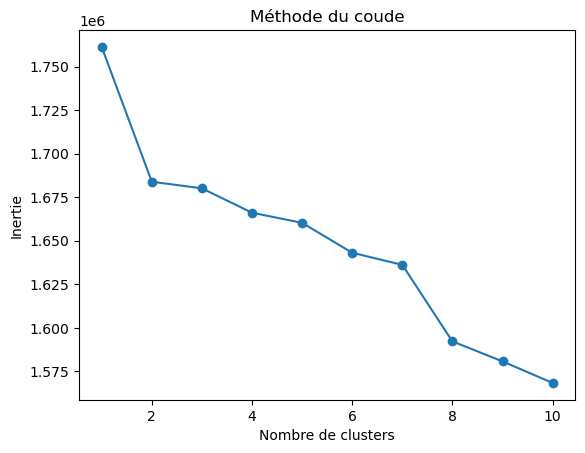

In [20]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Tracer l'inertie pour observer le coude
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

In [30]:
# Choisis un nombre de clusters, ici on prend k=3 pour l'exemple
k = 30
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

   ID  GRIDCODE CLIMATE SUB-CLIMAT SUB-SUB-CL  \
0   1        62   Polar     Tundra       None   
1   2        62   Polar     Tundra       None   
2   3        62   Polar     Tundra       None   
3   4        62   Polar     Tundra       None   
4   5        61   Polar      Frost       None   

                                            geometry  
0  POLYGON ((-37.5 83.5, -38 83.5, -38 84, -37.5 ...  
1  POLYGON ((-29.5 83.5, -37 83.5, -37 84, -29.5 ...  
2  POLYGON ((-46 83, -46 83.5, -44 83.5, -44 83, ...  
3  POLYGON ((-42.5 83.5, -39.5 83.5, -39.5 83, -4...  
4  POLYGON ((55.5 81, 55.5 81.5, 56 81.5, 56 81, ...  


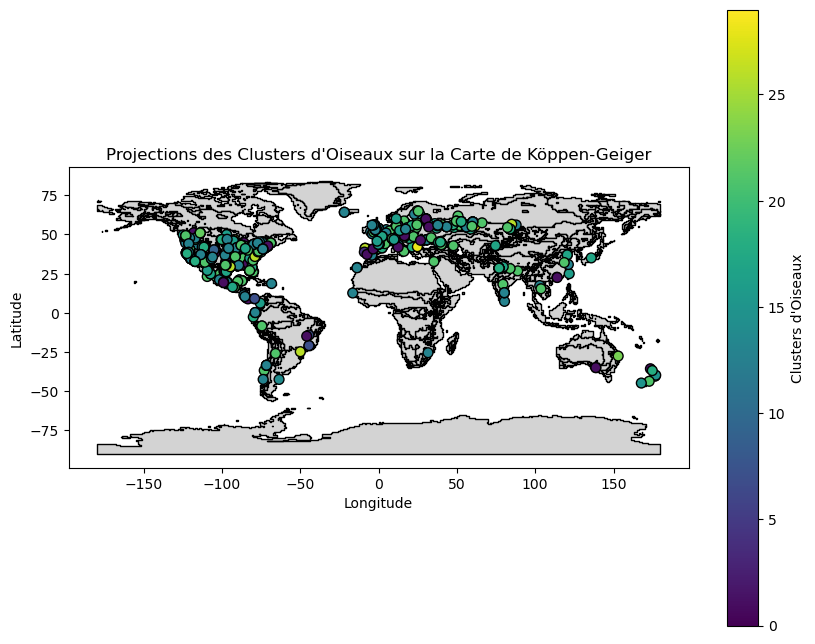

In [32]:
# Charger le shapefile de la carte de Köppen-Geiger
shapefile_path = '../../Donnees/climates/climates.shp'
map_koppen = gpd.read_file(shapefile_path)

# Vérifier que le shapefile est bien chargé
print(map_koppen.head())

# Création du GeoDataFrame des clusters
geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]
gdf_clusters = gpd.GeoDataFrame(df, geometry=geometry)

# Projeter les clusters dans le même système de coordonnées que la carte
gdf_clusters.set_crs('EPSG:4326', allow_override=True, inplace=True)

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer la carte de Köppen-Geiger en arrière-plan
map_koppen.plot(ax=ax, color='lightgray', edgecolor='black')

# Tracer les clusters avec une carte de couleurs (cmap)
scatter = ax.scatter(
    gdf_clusters.geometry.x, gdf_clusters.geometry.y,
    c=gdf_clusters['Cluster'], cmap='viridis', edgecolors='k', s=50
)

# Ajouter une légende sous forme de colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Clusters d'Oiseaux")

# Ajouter des titres et labels
plt.title("Projections des Clusters d'Oiseaux sur la Carte de Köppen-Geiger")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Afficher la carte avec la légende
plt.show()


# Visualisation avec PCA (réduction de dimension à 2 pour visualisation)

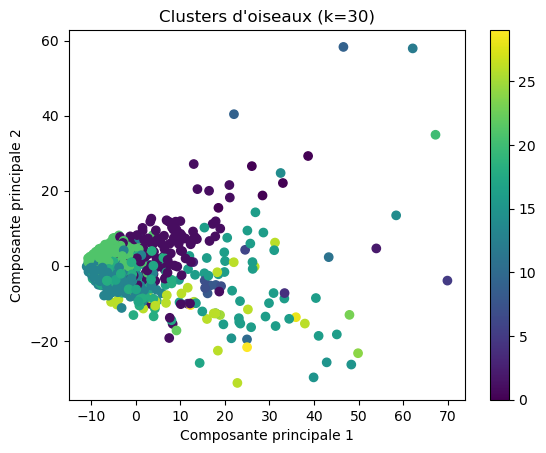

In [34]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Tracer les clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title(f'Clusters d\'oiseaux (k={k})')
plt.colorbar()
plt.show()

# Evaluation les caractéristiques moyennes de chaque cluster

In [36]:
# Recréer un DataFrame avec les features normalisées et la colonne "Cluster"
df['Cluster'] = kmeans.labels_  # Ajouter les clusters

In [38]:
# 1. Calculer la moyenne des features pour chaque cluster
df_cluster= df.drop(['species_x', 'image_name', 'Unnamed: 0_x', 'Unnamed: 0_y', 
                   'species_y', 'climate_var1', 'climate_var2', 'climate_var3',
                   'longitude', 'latitude'], axis=1)
cluster_means = df_cluster.groupby('Cluster').mean()

# 2. Afficher le tableau des moyennes
print(cluster_means)

               f1        f2        f3        f4        f5        f6        f7  \
Cluster                                                                         
0        0.795816  0.022382  0.044368  0.002341  0.087023  0.003516  0.123420   
1        0.102096  0.108910  0.062126  0.006160  0.090477  0.020102  0.391203   
2        0.290559  0.004325  0.000000  0.000000  0.003569  0.000000  0.053776   
3        0.011300  0.044422  0.510750  0.010286  0.514342  0.039622  1.065707   
4        0.304587  0.000000  0.061478  0.000000  0.032442  0.001378  0.121784   
5        0.658784  0.000689  0.262744  0.000000  0.096010  0.000000  0.000000   
6        0.000000  0.031873  0.071874  0.000000  0.054028  0.000000  0.625097   
7        0.040421  0.000000  0.000000  0.000000  0.010033  0.005791  0.003428   
8        0.018621  0.001082  0.062718  0.000000  0.193102  0.006648  0.069739   
9        0.962868  0.000000  0.012588  0.000000  0.021485  0.100495  0.222549   
10       0.026250  0.246749 

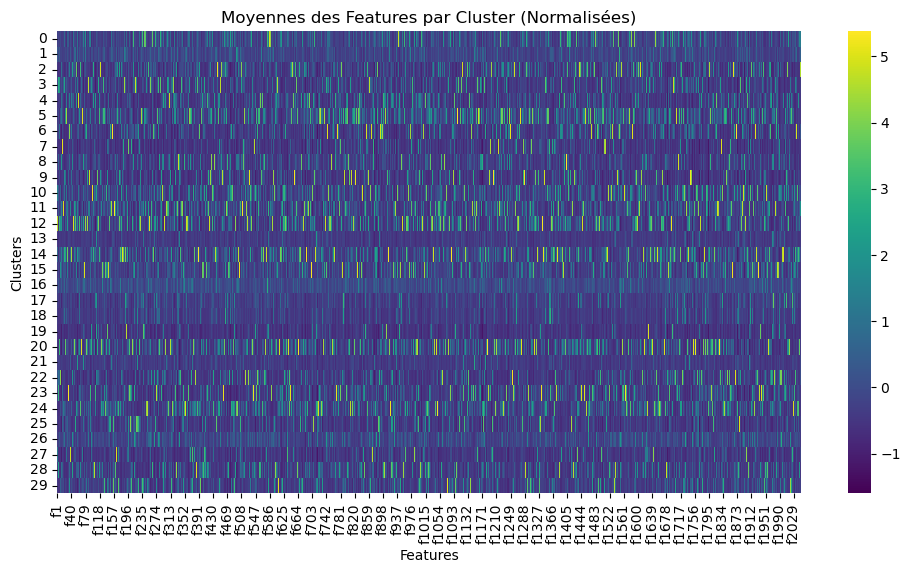

In [40]:
# Normalisation des moyennes des clusters
scaler = StandardScaler()
cluster_means_scaled = pd.DataFrame(scaler.fit_transform(cluster_means), 
                                    index=cluster_means.index, 
                                    columns=cluster_means.columns)

# Affichage du heatmap après normalisation
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means_scaled, cmap="viridis", annot=False)
plt.title("Moyennes des Features par Cluster (Normalisées)")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()


In [42]:
#Analyser les features dominantes par cluster
for cluster in cluster_means.index:
    print(f"\n🔹 Cluster {cluster} : Features dominantes")
    print(cluster_means.loc[cluster].sort_values(ascending=False).head(10))  # Top 10 features les plus élevées



🔹 Cluster 0 : Features dominantes
f1145    3.867049
f34      3.106101
f903     2.196863
f940     1.906949
f1030    1.766836
f669     1.441750
f985     1.401071
f1408    1.393748
f874     1.265587
f1382    1.094763
Name: 0, dtype: float64

🔹 Cluster 1 : Features dominantes
f105     1.399588
f229     1.182778
f408     1.089839
f874     1.047335
f1898    1.007477
f1499    0.941441
f248     0.814438
f1288    0.811978
f960     0.810499
f94      0.782002
Name: 1, dtype: float64

🔹 Cluster 2 : Features dominantes
f900     6.267916
f1955    3.104741
f1239    2.982201
f1597    2.948254
f1399    2.568804
f733     2.422641
f1260    2.170393
f1272    1.948836
f43      1.861391
f1594    1.803194
Name: 2, dtype: float64

🔹 Cluster 3 : Features dominantes
f217     6.032259
f1499    5.239078
f408     3.982375
f1044    3.560680
f1898    3.119664
f1511    3.110719
f229     2.788295
f72      2.758510
f248     2.674392
f1288    2.610180
Name: 3, dtype: float64

🔹 Cluster 4 : Features dominantes
f310     

In [44]:
# Comparer les clusters entre eux
feature_variability = cluster_means.std().sort_values(ascending=False)
print("\n📊 Features les plus variables entre les clusters :")
print(feature_variability.head(10))  # Top 10 features avec la plus grande variabilité



📊 Features les plus variables entre les clusters :
f163     2.292686
f1519    1.381844
f1499    1.283243
f217     1.140554
f900     1.134898
f105     1.065247
f331     1.044346
f310     1.001391
f408     0.997496
f1898    0.991628
dtype: float64
